### Instructions


*   The aim of this assignment is to learn machine learning tools - Keras, Sklearn and PyTorch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are three parts of this assignment. The import statemnets for the required libraries is already given.
*   **Carefully read the submission instructions and plagiarism policy.**
*   Deadline to submit this assignment is 17th November 2022, 11:55pm on LMS.
*   TAs will not be allowed to debug your code or answer how to solve a question.

### Submission Instructions

You should submit both your notebook file (.ipynb), python script (.py) and dataset (.csv) on LMS.
Please name your files Name_RollNo_Assignment3. Zip these files in a folder and name
the folder Name_RollNo_Assignment3. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**


### Introduction
In this assignment, you will be implementing neural network for the provided dataset using Sklearn, Keras and PyTorch. A description of the problem statement is given at the start of each part. 

Have fun!

In [5]:
import numpy as np
import pandas as pd
from csv import writer
import mlnotify
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Part 1: Feature Extraction
You are given [MNIST audio dataset](https://drive.google.com/file/d/1imgBIVbgtGPV31r64UghSK3161Qfumsm/view?usp=sharing) which contains audio recordings, where speakers say digits (0 to 9) out loud. Use the following line of code to read the audio file:
```python
audio, sr = librosa.load(file_path, sr=16000)
```
You need to extract MFCC features for each audio file, the feature extraction code is give (you can read about MFCC from [here](https://link.springer.com/content/pdf/bbm:978-3-319-49220-9/1.pdf)). Length of each feature vector will be 13. You need to save all the feature vectors in a csv file with ith column representing ith feature, and each row representing an audio file. Add a 'y' column to the csv file and append the labels column at the end. Your csv file should look like this:

| x1 | x2 | x3 | x4 | x5 | x6 | x7 | x8 | x9 | x10 | x11 | x12 | x13 | y |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| -11.347038 | -8.070062 | -0.915299 | 6.859546 | 8.754656 | -3.440287 | -5.738487 | -21.853178 | -9.859462 | 3.584948 | -2.661195	| 1.023747 | -4.574332 | 2 |

Split the dataset into train and test with 80:20 ratio. Print the train data size and test data size.

In [6]:
from glob import glob
import python_speech_features as mfcc
import librosa
from sklearn.model_selection import train_test_split

In [7]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [8]:
import os
root_dir = r"D:\u_Senior_Fall\ML\Assignments\Assignment3\data"
file_set = []

for dir_, _, files in os.walk(root_dir):
    for file_name in files:
        rel_dir = os.path.relpath(dir_, root_dir)
        rel_file = os.path.join(rel_dir, file_name)
        file_set.append("data\\"+rel_file)

In [611]:
mlnotify.start()
first = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','y']
with open('mnist.csv', 'a', newline='') as f_object:
    writer_object = writer(f_object)
    writer_object.writerow(first)
    for i in file_set:
        audio, sr = librosa.load(i, sr=16000)
        mean = get_MFCC(audio, sr)
        mean = list(mean)
        mean.append(i[8])
        writer_object.writerow(mean)
    f_object.close()
mlnotify.end()

                                     
                                     
    █▀▀▀▀▀█ █  ▄▄ ▀▀▄ █▄  █▀▀▀▀▀█    
    █ ███ █ ██▄ █▄▀▄▄▀▀▄  █ ███ █    
    █ ▀▀▀ █ ▄██ ▀█▄▀▀█▀▄▄ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀ █▄▀ █ ▀▄▀▄▀ ▀▀▀▀▀▀▀    
    ▀▀ ▄█▀▀   ▀ ▀▄▀█▄▀▄▀ ▄▄█▄████    
    ▀▄▀ ██▀▄ █▀ ▄▀▄█▄▄▄▄█▄█ █▄ ▄█    
    ▄▄▄▄█ ▀▀█ ▄▀▄▄▀█▄█▄ ▀▀▄▄▄▄▄█▄    
    ▄  ▄▄█▀ ▄ ▀█▀ ▄▀▀▄█  ▀▄▀█▀▀▄█    
    █▀ ▄▄▄▀  ██ ▀▄▀█▄█▄▀ ▀▄▄▄▄ █▄    
      ▀█▄ ▀ ▀▄█ ▄ ▀█▄██ ▀▄▀▀▄ ▀▄█    
    ▀▀▀▀▀ ▀▀▄ █▀▄▄▀█▄████▀▀▀█▀  █    
    █▀▀▀▀▀█ ▄▄▀█▀ ▀█▄▄███ ▀ █▀▀ ▀    
    █ ███ █ ▀ ▀ ▀▄▀▄▄▀ █▀█▀▀▀▀  █    
    █ ▀▀▀ █ ▄▀█ ▄▀ ▀██▀▀█▄   █▀██    
    ▀▀▀▀▀▀▀ ▀▀ ▀▀▀▀ ▀▀ ▀▀▀ ▀ ▀ ▀     
                                     
                                     
https://mlnotify.aporia.com/training/131442

Scan the QR code or enter the url to get a notification when your training is done




In [639]:
data = pd.read_csv(r'D:\u_Senior_Fall\ML\Assignments\Assignment3\mnist.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,-10.679614,-1.126155,-2.921500,7.777644,-4.234647,-1.907632,-15.338491,-3.180810,2.313479,-10.125013,-3.455760,4.896240,-12.021362,0
1,-11.423947,-1.890179,-1.148646,10.610124,1.231129,-4.728646,-13.272780,1.202890,0.686237,-5.113064,2.272280,6.805703,-8.340184,0
2,-10.253554,-2.093445,-5.647451,6.346362,-1.961829,-1.761370,-14.366297,-6.844078,-0.555402,-5.644106,-2.729775,4.582464,-7.005110,0
3,-10.208797,-3.407698,-8.520919,3.171731,-1.332095,-7.890483,-19.013466,-1.750540,8.268122,-3.398884,-2.734833,8.183276,-12.306567,0
4,-10.512413,-4.236322,-0.662954,3.462385,-4.762044,-3.514585,-16.976979,-0.667198,1.336080,-7.423439,-2.892023,5.200130,-8.368142,0


In [640]:
x = data.drop('y', axis=1)
y = data[['y']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 13)
(6000, 13)
(24000, 1)
(6000, 1)


## Part 2: Neural Network Implementation

### Task 2.1:  Scikit-learn

In this part you will use the [Scikit-learn](https://scikit-learn.org/stable/index.html) to implement the [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

In [614]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [615]:
x_trainn, x_eval, y_trainn, y_eval = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
x_trainn = x_trainn.to_numpy('float32')
x_eval = x_eval.to_numpy('float32')
y_trainn = y_trainn.to_numpy('float32')
y_eval = y_eval.to_numpy('float32')

In [616]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_trainn, y_trainn)
acc = clf.score(x_eval, y_eval)
print('Accuracy on eval: ', acc)

C:\users\23100\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on eval:  0.9408333333333333


C:\users\23100\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [617]:
# Accuracy on test set
acc = clf.score(x_test, y_test)
print('Accuracy on test: ', acc)

Accuracy on test:  0.9361666666666667


C:\users\23100\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


C:\users\23100\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       596
           1       0.94      0.92      0.93       599
           2       0.85      0.93      0.89       605
           3       0.94      0.90      0.92       589
           4       0.97      0.97      0.97       607
           5       0.96      0.97      0.97       603
           6       0.99      0.98      0.99       620
           7       0.95      0.96      0.96       589
           8       0.95      0.97      0.96       583
           9       0.93      0.90      0.92       609

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



<AxesSubplot:>

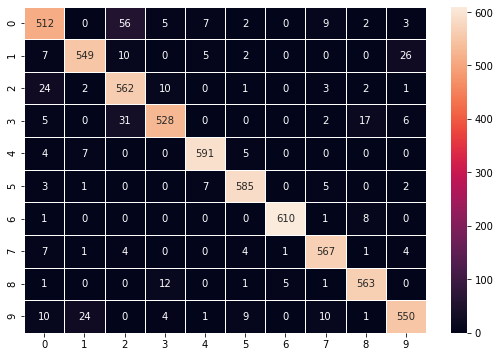

In [618]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)

### Task 2.2: Tensorflow Keras

In this part you will use the [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to implement the [Neural Network](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

In [619]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [620]:
# Set the parameters accordingly
LEARNING_RATE = 1e-3
BATCH_SIZE = 64
EPOCHS = 150

In [621]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), metrics=['accuracy'])

In [622]:
model.fit(x_trainn, y_trainn, epochs=EPOCHS, batch_size=BATCH_SIZE)

                                     
                                     
    █▀▀▀▀▀█ ▄█ ▄▄█▄▄▄ █▀█ █▀▀▀▀▀█    
    █ ███ █ ▄█▀█ ▄▀▄▀▄▄▄  █ ███ █    
    █ ▀▀▀ █ ▄ █ ▀ █▄▀█▀▀▀ █ ▀▀▀ █    
    ▀▀▀▀▀▀▀ ▀ ▀ █ ▀ █ █▄▀ ▀▀▀▀▀▀▀    
    ██▀▀█▄▀█▀█▀ ▀▀▄ ▄▀▄▄█▀▄█▄▀ ▀▄    
    ▄▄▀▀█▄▀  █▄█▀▀ █▀▀▀▄█▄ █ ▄ ▄     
    ▄█▀▄█ ▀▄█▀▄▀▄▀▄ ▄█▄█▄▄▄▄▄▀▀ ▄    
     ▄▀ ▀▄▀  ▀▀ ▄ ▀▀▄▀   ▀▀▄ ▀▀▄     
    █ █ █▄▀▄ █▀ ▀█▄ ▄█▄▄█▄▄▄▄▀█ ▄    
    █  ▄▄ ▀█ █ █▀ ▄█▀   ▀▄▄▄▀ ▀▄     
    ▀ ▀ ▀ ▀ █▄█▀▄▀▄ ▄██ █▀▀▀█▄███    
    █▀▀▀▀▀█ ▀▀  ▄▀▄█▀▀ ██ ▀ █▀▀ ▄    
    █ ███ █ ██  ▀▀▄▀▄▀  █▀▀▀▀▄███    
    █ ▀▀▀ █ █▀▄█▀ ▄▀  ▄▀█▄████▀█     
    ▀▀▀▀▀▀▀ ▀ ▀▀▀  ▀▀▀     ▀  ▀      
                                     
                                     
https://mlnotify.aporia.com/training/424931

Scan the QR code or enter the url to get a notification when your training is done


Epoch 1/150
338/338 [==============================] - 1s 1ms/step - loss: 1.2915 - accuracy: 0.5495
Epoch 2/150
338/338 [==========================

In [623]:
_, accuracy = model.evaluate(x_trainn, y_trainn)
print('Accuracy on train: %.2f' % (accuracy*100))

675/675 [==============================] - 1s 639us/step - loss: 0.0018 - accuracy: 0.9996
Accuracy on train: 99.96


In [624]:
_, accuracy = model.evaluate(x_eval, y_eval)
print('Accuracy on eval: %.2f' % (accuracy*100))

75/75 [==============================] - 0s 703us/step - loss: 0.2956 - accuracy: 0.9567
Accuracy on eval: 95.67


188/188 [==============================] - 0s 996us/step - loss: 0.3077 - accuracy: 0.9548
Accuracy on eval: 95.48
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       596
           1       0.94      0.94      0.94       599
           2       0.93      0.92      0.92       605
           3       0.95      0.94      0.95       589
           4       0.97      0.97      0.97       607
           5       0.98      0.98      0.98       603
           6       1.00      0.99      0.99       620
           7       0.97      0.98      0.98       589
           8       0.95      0.98      0.97       583
           9       0.94      0.94      0.94       609

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



<AxesSubplot:>

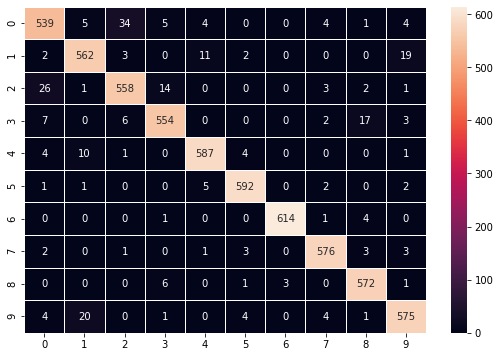

In [625]:
# Report on test

y_pred = model.predict(x_test)
predicted_categories = np.argmax(y_pred, axis = 1)
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on eval: %.2f' % (accuracy*100))
print(classification_report(y_test, predicted_categories))
confusion = confusion_matrix(y_test, predicted_categories)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)

### Task 2.3: Pytorch 

In this part you will use the [Keras](https://pytorch.org/docs/stable/nn.html) to implement the [Neural Network](https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. You need to use DataLoader to generate batches of data. Tune the hyperparameters to get the best possible classification accuracy. You need to report training loss, training accuracy, validation loss and validation accuracy after each epoch in the following format:
```
Epoch 1/2
loss: 78.67749792151153 - accuracy: 0.6759259259259259 - val_loss: 6.320814955048263 - val_accuracy: 0.7356481481481482
Epoch 2/2
loss: 48.70551285566762 - accuracy: 0.7901234567901234 - val_loss: 6.073690168559551 - val_accuracy: 0.7791666666666667
```
You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

In [626]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

In [627]:
class Data(Dataset):
    def __init__(self, X_train, y_train):
        self.X = torch.from_numpy(X_train.astype(np.float32))
        self.y = torch.from_numpy(y_train).type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len

In [628]:
# number of features (len of X cols)
input_dim = 13
# number of hidden layers
hidden_layers = 5
# number of classes (unique of y)
output_dim = 10

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_dim, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 32)
        self.linear4 = nn.Linear(32, 16)
        self.linear5 = nn.Linear(16, output_dim)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = torch.relu(self.linear4(x))
        x = self.linear5(x)
        return x

In [629]:
# Set the parameters accordingly
LEARNING_RATE = 0.01
BATCH_SIZE = 64
EPOCHS = 100

In [630]:
# Set the loss function and optimizer accordingly
model = NeuralNetwork()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [631]:
traindata = Data(x_trainn, y_trainn)
trainloader = DataLoader(traindata, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
evaldata = Data(x_eval, y_eval)
evalloader = DataLoader(evaldata, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

Epoch 1/100 - loss: 1.6431365750245088 - accuracy: 41.907407407407405 - val_loss: 0.8935385330727226 - val_acc: 66.29166666666667
Epoch 2/100 - loss: 0.6541516786143624 - accuracy: 74.75462962962963 - val_loss: 0.6406106909638957 - val_acc: 75.16666666666667
Epoch 3/100 - loss: 0.5143129560192661 - accuracy: 79.04629629629629 - val_loss: 0.4778179777295966 - val_acc: 81.08333333333333
Epoch 4/100 - loss: 0.4691845710284611 - accuracy: 81.19907407407408 - val_loss: 0.4479337115036814 - val_acc: 82.16666666666667
Epoch 5/100 - loss: 0.43662074455142724 - accuracy: 82.86111111111111 - val_loss: 0.41490912437438965 - val_acc: 84.25
Epoch 6/100 - loss: 0.4079181131350218 - accuracy: 84.14814814814815 - val_loss: 0.4379996626000655 - val_acc: 83.125
Epoch 7/100 - loss: 0.38950624674029605 - accuracy: 84.96296296296296 - val_loss: 0.38900282194739894 - val_acc: 85.125
Epoch 8/100 - loss: 0.3695446326006094 - accuracy: 85.75 - val_loss: 0.4250012989106931 - val_acc: 84.33333333333333
Epoch 9/1

Epoch 67/100 - loss: 0.1036213079258006 - accuracy: 96.24074074074075 - val_loss: 0.3267963011013834 - val_acc: 89.875
Epoch 68/100 - loss: 0.10032906769581977 - accuracy: 96.32407407407408 - val_loss: 0.20824894465898214 - val_acc: 93.33333333333333
Epoch 69/100 - loss: 0.09772659710900494 - accuracy: 96.40277777777777 - val_loss: 0.21523651250294948 - val_acc: 93.16666666666667
Epoch 70/100 - loss: 0.09625290318794505 - accuracy: 96.52777777777777 - val_loss: 0.20911241435494862 - val_acc: 93.29166666666667
Epoch 71/100 - loss: 0.09670645441617486 - accuracy: 96.63425925925925 - val_loss: 0.1940328208239455 - val_acc: 94.16666666666667
Epoch 72/100 - loss: 0.0937784185616531 - accuracy: 96.6574074074074 - val_loss: 0.2069647891544982 - val_acc: 93.95833333333333
Epoch 73/100 - loss: 0.09363110147736217 - accuracy: 96.66666666666667 - val_loss: 0.1916972415423707 - val_acc: 94.08333333333333
Epoch 74/100 - loss: 0.0905387788768527 - accuracy: 96.88425925925925 - val_loss: 0.1943873581

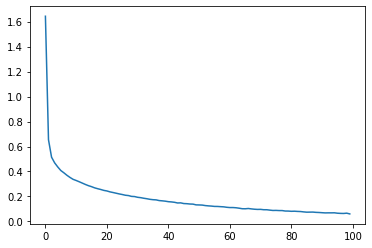

In [632]:
import matplotlib.pyplot as plt

loss_list = []
for epoch in range(EPOCHS):
    running_loss = 0.0
    correct = 0.0
    total = 0.0
    running_loss_eval = 0.0
    correct_eval = 0.0
    total_eval = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        # forward propagation
        outputs = model(inputs)
        loss = loss_function(outputs, labels.squeeze())
        # backward propagation
        loss.backward()
        # optimize
        optimizer.step()
        __, predicted = torch.max(outputs.data, 1)
        predicted = predicted.unsqueeze(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()
    with torch.no_grad():
        for data in evalloader:
            inputs, labels = data
            # calculate output by running through the network
            outputs = model(inputs)
            loss = loss_function(outputs, labels.squeeze())
            # get the predictions
            __, predicted = torch.max(outputs.data, 1)
            # update results
            predicted = predicted.unsqueeze(1)
            total_eval += labels.size(0)
            correct_eval += (predicted == labels).sum().item()
            running_loss_eval += loss.item()
    print(f'Epoch {epoch+1}/{EPOCHS} - loss: {running_loss / len(trainloader)} - accuracy: {100 * correct / total} - val_loss: {running_loss_eval / len(evalloader)} - val_acc: {100 * correct_eval / total_eval}')
    loss_list.append(running_loss / len(trainloader))
plt.plot(loss_list)

In [643]:
correct, total = 0, 0
# print(type(x_test))
x_test = x_test.to_numpy('float32')
y_test = y_test.to_numpy('float32')
testdata = Data(x_test, y_test)
testloader = DataLoader(testdata, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
y_pred_list = []
labels_list = []
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        __, predicted = torch.max(outputs.data, 1)
        predicted = predicted.unsqueeze(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_pred_list.append(predicted.cpu().numpy())
        labels_list.append(labels.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(f'Accuracy of the network on the {len(testdata)} test data: {100 * correct // total} %')

Accuracy of the network on the 6000 test data: 94 %


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       596
           1       0.94      0.93      0.94       599
           2       0.87      0.90      0.89       605
           3       0.92      0.93      0.92       589
           4       0.96      0.98      0.97       607
           5       0.97      0.98      0.97       603
           6       0.99      0.99      0.99       620
           7       0.96      0.97      0.97       589
           8       0.94      0.97      0.95       583
           9       0.96      0.93      0.94       609

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



<AxesSubplot:>

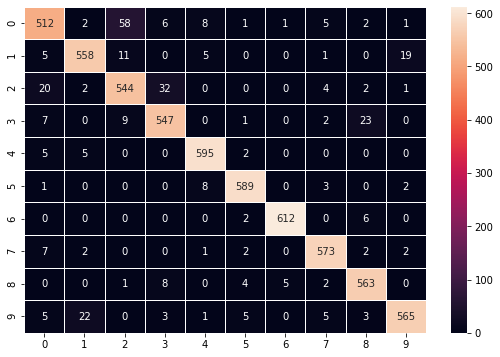

In [644]:
li = []
le = []
for i in y_pred_list:
    for j in i:
        li.append(j)
        
for i in labels_list:
    for j in i:
        le.append(j)
li = np.asarray(li)
le = np.asarray(le)
print(classification_report(le, li))
confusion = confusion_matrix(le, li)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, ax=ax)

## Part 3: Theoretical

**Q1**: Compare the tools you used above. State the advantages and disadvantages.

**Q2**: What is the purpose of the data loader in PyTorch?

Q1: Keras provides relatively higher accuracy than its counterparts. Pytorch provides higher cutomization than Keras and Sklearn since Engineers can define the properties of every layer separately. However, Sklearn is easiest annd most intuitive since it optimizes the NN without much input from the Engineer. 

Q2. Data loader is a way to load dataset into a variable and run the NN on the dataset in batches. Instead of sequentially running NN on the batches of dataset, data loader does that with a single command.